# [ Pandas ]
> cf. Numpy와 차이점
1. 행렬에 index를 부여함. (numpy는 이름을 부여하지 않음)
2. 데이터 type이 동일할 필요가 없음. (numpy는 array 안의 데이터 type이 동일해야함)

In [1]:
import pandas as pd
import numpy as np
x1 = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd']) ; x1

a    1
b    2
c    3
d    4
dtype: int64

In [2]:
# 자료형 1) Series : index와 value로 구성됨!
print(x1.index) 
print(x1.values)

Index(['a', 'b', 'c', 'd'], dtype='object')
[1 2 3 4]


In [3]:
# 슬라이싱(index, values로 모두 가능)
x1['a':'c']

a    1
b    2
c    3
dtype: int64

**인덱스로 슬라이싱 하면, 마지막 인덱스까지 포함해서 출력함!**   
숫자로 슬라이싱을 하면, n-1번째까지만 출력함!

In [4]:
x1[0:3] # 0번째에서 2번째 행까지

a    1
b    2
c    3
dtype: int64

In [5]:
# dictionary > series 변환(dict의 key를 index로 반환!)
dict1 = {'아': 2, '졸려': 34, '블루라이트안경':55, '가져올걸':44}
s = pd.Series(dict1) ;s

아           2
졸려         34
블루라이트안경    55
가져올걸       44
dtype: int64

In [6]:
# 자료형 2) DataFrame
# 2D array 지정, columns과 index 이름도 지정 가능하다는 점!~!~
x2 = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns = ['a', 'b', 'c'], index=['가','나','다']);x2

,a,b,c
가,1,2,3
나,4,5,6
다,7,8,9


In [7]:
x3 = pd.DataFrame(s, columns=['지금 내 상태']) ; x3

,지금 내 상태
아,2
졸려,34
블루라이트안경,55
가져올걸,44


In [8]:
dict2 = {'아': 'a', '졸려':'b', '블루라이트안경':'c', '가져올걸':'d'}
s2 = pd.Series(dict2)
print(s);print(s2) # 둘다 1D tensor임!

아           2
졸려         34
블루라이트안경    55
가져올걸       44
dtype: int64
아          a
졸려         b
블루라이트안경    c
가져올걸       d
dtype: object


In [9]:
# 두 1D tensor(Series)를 딕셔너리로 묶어서 DataFrame으로 만듦(이름도 지정)
y = pd.DataFrame({'첫째칼럼': s, '둘째칼럼':s2}) ; y

,첫째칼럼,둘째칼럼
아,2,a
졸려,34,b
블루라이트안경,55,c
가져올걸,44,d


In [10]:
y['아':'블루라이트안경'] # 인덱스 선택

,첫째칼럼,둘째칼럼
아,2,a
졸려,34,b
블루라이트안경,55,c


### 편집과 슬라이싱

In [11]:
w = pd.DataFrame(np.arange(12).reshape(3,4), columns=['a', 'b', 'c', 'd'])
w

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [12]:
np.arange(12).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
# loc
print(w.loc[:, 'b']) # 모든 행에 대해 b 칼럼을 선택
print(w.loc[0:1, :]) # 0~1행까지 모든 칼럼을 선택

0    1
1    5
2    9
Name: b, dtype: int32
   a  b  c  d
0  0  1  2  3
1  4  5  6  7


In [14]:
# iloc : 위치로 인덱싱
print(w.iloc[0:1, :]) # 위치로 인덱싱하기 때문에 1을 포함하지 않는다

   a  b  c  d
0  0  1  2  3


In [15]:
# 다른 차원의 연산
d1 = pd.DataFrame([[1,2], [3,4]], columns=['a','b']);print(d1)
d2 = pd.DataFrame([[11,22,33], [44, 55, 66], [77,88,99]], columns=['a','b','c']);print(d2)

print(d1 * d2) # 차원이 다르면 남는 차원의 자리는 NaN이 반환된다

   a  b
0  1  2
1  3  4
    a   b   c
0  11  22  33
1  44  55  66
2  77  88  99
       a      b   c
0   11.0   44.0 NaN
1  132.0  220.0 NaN
2    NaN    NaN NaN


In [16]:
print(d1+d2)

      a     b   c
0  12.0  24.0 NaN
1  47.0  59.0 NaN
2   NaN   NaN NaN


### 1. 결측치의 처리

In [17]:
n = pd.Series([1, np.nan, 'missing', None]);n

0          1
1        NaN
2    missing
3       None
dtype: object

In [18]:
n.isnull() # np.nan과 None값을 null값으로 출력

0    False
1     True
2    False
3     True
dtype: bool

In [19]:
n.notnull() # 결측치가 아닌 자료

0     True
1    False
2     True
3    False
dtype: bool

In [20]:
n[n.isnull()]

1     NaN
3    None
dtype: object

In [21]:
# fillna : 결측치 채우기
n.fillna(0)

0          1
1          0
2    missing
3          0
dtype: object

In [22]:
m = pd.DataFrame([[1, None, 2, None], [4,5,6,None], [None, 7, 8, None]], index=list('123'), columns=list('abcd'))
m

,a,b,c,d
1,1.0,NaN,2,None
2,4.0,5.0,6,None
3,NaN,7.0,8,None


In [23]:
# cf) 이렇게 정의해도 됨! list는 꼭 써줘야함!
list('abcd')

['a', 'b', 'c', 'd']

In [24]:
# dropna : 결측치 제거
m.dropna(axis='columns', how='all') # column 이 모두 null값이면 drop시켜라

,a,b,c
1,1.0,NaN,2
2,4.0,5.0,6
3,NaN,7.0,8


In [25]:
# thresh 활용
m.dropna(axis='rows', thresh=3) # 3개 이상의 null이 아닌 요소가 있는 행만 남김

,a,b,c,d
2,4.0,5.0,6,None


In [26]:
# bfill : backward fill(뒤로 채운다)
m.fillna(method='bfill', axis=1)

,a,b,c,d
1,1.0,2.0,2.0,NaN
2,4.0,5.0,6.0,NaN
3,7.0,7.0,8.0,NaN


In [27]:
# ffill : forward fill(앞으로 채운다)
m.fillna(method='ffill', axis=1)

,a,b,c,d
1,1.0,1.0,2.0,2.0
2,4.0,5.0,6.0,6.0
3,NaN,7.0,8.0,8.0


### 2. 논리적 인덱스
T/F 값으로 인덱싱을 한다!

In [28]:
m = pd.DataFrame([[1, None, 2, None], [4,5,6,None], [None, 7, 8, None]], index=list('123'), columns=list('abcd'))
m

,a,b,c,d
1,1.0,NaN,2,None
2,4.0,5.0,6,None
3,NaN,7.0,8,None


In [29]:
# 값을 변경
m.loc['2', 'b'] = 99 # 인덱스, 칼럼이름을 차례로 선택
m

,a,b,c,d
1,1.0,NaN,2,None
2,4.0,99.0,6,None
3,NaN,7.0,8,None


In [30]:
m[ pd.isnull(m['b']) ] # b행에서 null이 있는 열(True)만 가로로 출력

,a,b,c,d
1,1.0,NaN,2,None


In [31]:
pd.isnull(m['b'])

1     True
2    False
3    False
Name: b, dtype: bool

In [32]:
m[pd.isnull(m).any(axis=1)] # 3개의 행이 모두 null을 가진다 > 모두 출력

,a,b,c,d
1,1.0,NaN,2,None
2,4.0,99.0,6,None
3,NaN,7.0,8,None


In [33]:
# df[열][행]
m[pd.isnull(m).any(axis=1)]['b'] # null값이 하나라도 있는 행 중에서 'b' 열 출력

1     NaN
2    99.0
3     7.0
Name: b, dtype: float64

In [34]:
# loc를 이용해도 똑같이 나옴!
m.loc[pd.isnull(m).any(axis=1), 'b']

1     NaN
2    99.0
3     7.0
Name: b, dtype: float64

In [35]:
# loc를 쓰지 않으면 에러가 나오니까 주의하자!
m[pd.isnull(m).any(axis=1), 'b']

TypeError: '(1    True
2    True
3    True
dtype: bool, 'b')' is an invalid key

In [36]:
k = pd.DataFrame(np.arange(12).reshape(3,4), columns=list('abcd'));k

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [37]:
k.loc[k['b'] > 4]['c'] # b가 4보다 큰 행(True)에서 c열만 출력!

1     6
2    10
Name: c, dtype: int32

In [38]:
k.loc[k['b']>4, 'c'] # 대괄호 두개를 합쳐도 같은 결과!

1     6
2    10
Name: c, dtype: int32

In [39]:
k['b']>4

0    False
1     True
2     True
Name: b, dtype: bool

In [40]:
# 마지막에 지정하는 행이 두개 이상일 때
# 두번째 loc(묶어서 안에 같이쓰는 것) 이용해야함. 
k.loc[k['b']>4, ['b', 'd']]

,b,d
1,5,7
2,9,11


In [41]:
# arange 다음에는 꼭 reshape 써줘야한다!!
d = pd.DataFrame(np.arange(6).reshape(2,3), index=list('ab'), columns=list('123'))
d

,1,2,3
a,0,1,2
b,3,4,5


In [42]:
# stack : multi index로 인덱스를 펼쳐줌
d.stack()

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
dtype: int32

In [43]:
# unstack : 인덱스의 위치를 바꿔줌
d.unstack()

1  a    0
   b    3
2  a    1
   b    4
3  a    2
   b    5
dtype: int32

In [44]:
d.stack().unstack() # stack + unstack = 다시 원래대로 만들어줌!

,1,2,3
a,0,1,2
b,3,4,5


### 3. Data 붙이기
- concat
- merge
- groupby

In [45]:
a1 = pd.DataFrame(np.arange(1,7).reshape(2,3), index=list('01'), columns=list('abc'))
a2 = pd.DataFrame([[11,22,33],[44,55,66]], index=list('12'), columns=list('bcd'))
print(a1)
print(a2)

   a  b  c
0  1  2  3
1  4  5  6
    b   c   d
1  11  22  33
2  44  55  66


In [46]:
# 1. concat(디폴트는 아래로 붙이기)
pd.concat([a1, a2]) # 만약에 채워지지 못할 인덱스가 있다면 NaN으로 반환
# 지금 인덱스가 그대로 정직하게 붙어있는것을 볼 수 있음. 

,a,b,c,d
0,1.0,2,3,NaN
1,4.0,5,6,NaN
1,NaN,11,22,33.0
2,NaN,44,55,66.0


In [47]:
# ignore_index=True : 인덱스 순서 재지정
pd.concat([a1, a2], ignore_index=True)

,a,b,c,d
0,1.0,2,3,NaN
1,4.0,5,6,NaN
2,NaN,11,22,33.0
3,NaN,44,55,66.0


In [48]:
# join='inner' : 공통된 열만 아래로 붙이기 
pd.concat([a1, a2], join='inner')

,b,c
0,2,3
1,5,6
1,11,22
2,44,55


In [49]:
# 옆으로 붙일때는 axis=1
pd.concat([a1, a2], axis=1)

,a,b,c,b,c,d
0,1.0,2.0,3.0,NaN,NaN,NaN
1,4.0,5.0,6.0,11.0,22.0,33.0
2,NaN,NaN,NaN,44.0,55.0,66.0


In [50]:
# 2. merge : 공통된 열을 기준으로 붙이기
s1 = pd.DataFrame([[1, 'aa', 3], [4, 'bb', 5]], columns=list('abc'))
s2 = pd.DataFrame([[11, 'bb'], [22, 'aa']], columns=list('db'))
s3 = pd.merge(s1, s2, on='b')
print(s1);print(s2)
s3

   a   b  c
0  1  aa  3
1  4  bb  5
    d   b
0  11  bb
1  22  aa


,a,b,c,d
0,1,aa,3,22
1,4,bb,5,11


In [51]:
# 근데 concat도 되지않나? 음,,,,,
ss = pd.concat([s1, s2], join='inner')
ss

,b
0,aa
1,bb
0,bb
1,aa


In [52]:
# 공통 열에 반복이 있는 경우
S11=pd.DataFrame([[1,'aa',3],[4,'bb',5],[6,'aa',7]],columns=list('abc'))
S21=pd.DataFrame([[11,'bb'],[22,'aa'],[33,'bb']],columns=list('db'))
print(S11)
print(S21)
print('-------------------------')
S31=pd.merge(S11,S21,on='b') 
print(S31) # element가 겹치는 경우 반복해서 알아서 채워줌

   a   b  c
0  1  aa  3
1  4  bb  5
2  6  aa  7
    d   b
0  11  bb
1  22  aa
2  33  bb
-------------------------
   a   b  c   d
0  1  aa  3  22
1  6  aa  7  22
2  4  bb  5  11
3  4  bb  5  33


In [53]:
# 칼럼 이름이 겹칠경우!
S12=pd.DataFrame([['aa',3],['bb',5],['aa',7]],columns=list('ab'))
S22=pd.DataFrame([[11,'bb'],[22,'aa']],columns=list('ba'))
print(S12)
print(S22)
print('=========================')
S32=pd.merge(S12,S22,on='a')
print(S32) # 알아서 x, y로 구분해준다~~

    a  b
0  aa  3
1  bb  5
2  aa  7
    b   a
0  11  bb
1  22  aa
    a  b_x  b_y
0  aa    3   22
1  aa    7   22
2  bb    5   11


In [54]:
# 공통 열의 이름이 다른경우 : left_on, right_on
U1=pd.DataFrame([[1,'aa',3],[4,'bb',5]],columns=list('abc'))
U2=pd.DataFrame([[11,'bb'],[22,'aa']],columns=list('de'))
print(U1)
print(U2)
print('-------------------------')
U3=pd.merge(U1,U2,left_on='b',right_on='e')
print(U3)
print('-------------------------')
U4=pd.merge(U1,U2,left_on='b',right_on='e').drop('e',axis=1)  #공통 열중 'e'열의 제거
print(U4)

   a   b  c
0  1  aa  3
1  4  bb  5
    d   e
0  11  bb
1  22  aa
-------------------------
   a   b  c   d   e
0  1  aa  3  22  aa
1  4  bb  5  11  bb
-------------------------
   a   b  c   d
0  1  aa  3  22
1  4  bb  5  11


In [55]:
# inner, outer, left : 공통 열이 있을 때 옆으로 붙이기
v1=pd.DataFrame([[1,'aa',3],[4,'bb',5]],columns=list('abc'))
v2=pd.DataFrame([[11,'cc'],[22,'aa']],columns=list('db'))

print(v1)
print(v2)
print('-'*50)

   a   b  c
0  1  aa  3
1  4  bb  5
    d   b
0  11  cc
1  22  aa
--------------------------------------------------


In [56]:
v3 = pd.merge(v1, v2, how='inner') # 공통열 'b'를 기준으로 교집합만 출력
v3

,a,b,c,d
0,1,aa,3,22


In [57]:
v4 = pd.merge(v1, v2, how='outer') # 공통열 'b'를 기준으로 합집합(없는 열도 만들어 출력)
v4

,a,b,c,d
0,1.0,aa,3.0,22.0
1,4.0,bb,5.0,NaN
2,NaN,cc,NaN,11.0


In [58]:
v5 = pd.merge(v1, v2, how='left')
v5 # v1을 기준으로 'b'열에 id가 있는 v2의 행만 옆에 붙임. 
# 기준이 v1이 되는거임!

,a,b,c,d
0,1,aa,3,22.0
1,4,bb,5,NaN


In [59]:
## groupby
rng = np.random.RandomState(1)
df = pd.DataFrame({'Id':['a', 'b', 'c', 'a', 'b', 'c'],
                  'x1': range(6),
                  'x2': rng.randint(0, 10, 6)}) # 0에서 10 사이 6개의 난수
df

,Id,x1,x2
0,a,0,5
1,b,1,8
2,c,2,9
3,a,3,5
4,b,4,0
5,c,5,0


In [60]:
# 통계량을 구하고 싶을때
df.groupby('Id').mean()

,x1,x2
Id,,
a,1.5,5.0
b,2.5,4.0
c,3.5,4.5


In [61]:
df.groupby('Id').std()

,x1,x2
Id,,
a,2.12132,0.000000
b,2.12132,5.656854
c,2.12132,6.363961


In [62]:
# 여러가지 통계량을 한번에 구하기(aggregate이용!)
# ID별로 x1, x2의 통계량들~~
df.groupby('Id').aggregate([min, max, np.mean, np.median, np.std])

x1                           x2                          
   min max mean median      std min max mean median       std
Id                                                           
a    0   3  1.5    1.5  2.12132   5   5  5.0    5.0  0.000000
b    1   4  2.5    2.5  2.12132   0   8  4.0    4.0  5.656854
c    2   5  3.5    3.5  2.12132   0   9  4.5    4.5  6.363961

In [63]:
# 기초통계량 구하기
df.groupby('Id')['x1'].describe() # Id별 x1칼럼의 describe()

,count,mean,std,min,25%,50%,75%,max
Id,,,,,,,,
a,2.0,1.5,2.12132,0.0,0.75,1.5,2.25,3.0
b,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
c,2.0,3.5,2.12132,2.0,2.75,3.5,4.25,5.0


### 4. data 저장하기

In [64]:
df=pd.DataFrame([[1,3,5],[2,4,6]],index=['a1','a2'], columns=['b1','b2','b3'])
df

,b1,b2,b3
a1,1,3,5
a2,2,4,6


In [65]:
df.to_excel('C:/Users/이다은/Desktop/머신러닝/강의자료/2장.xlsx', sheet_name='data')

In [66]:
# openpyxl 라이브러리 이용
df1 = pd.read_excel('C:/Users/이다은/Desktop/머신러닝/강의자료/2장/2장.xlsx')
df1

,Unnamed: 0,b1,b2,b3
0,a1,1,3,5
1,a2,2,4,6


In [67]:
# index_col = 0 해주기
df2 = pd.read_excel('C:/Users/이다은/Desktop/머신러닝/강의자료/2장/2장.xlsx', index_col=0)
df2 # header=0은 뭔지 모르겠지만 이것도 추가해줌

,b1,b2,b3
a1,1,3,5
a2,2,4,6


In [68]:
# index_col = None, header = None 일 때(header=None으로 설정하면 이따구로 됨;;;)
df3 = pd.read_excel('C:/Users/이다은/Desktop/머신러닝/강의자료/2장/2장.xlsx', index_col=None, header=None)
df3

,0,1,2,3
0,NaN,b1,b2,b3
1,a1,1,3,5
2,a2,2,4,6


In [70]:
df5 = df2.reset_index(drop=True) # row 인덱스 드롭
df5

,b1,b2,b3
0,1,3,5
1,2,4,6


In [72]:
df6 = df5.T.reset_index(drop=True).T # column 인덱스 드롭
df6

,0,1,2
0,1,3,5
1,2,4,6


In [74]:
df7 = df6.values;df7 # value로 안에 요소를 가져올 수도 있음. 

array([[1, 3, 5],
       [2, 4, 6]], dtype=int64)

------------

# [ 시각화 ]
### 1. matplotlib

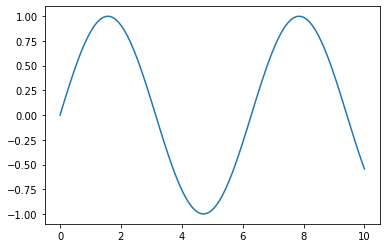

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100) # 0과 9사이를 100등분
plt.plot(x, np.sin(x))
plt.show()

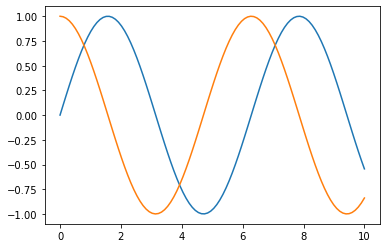

In [78]:
# 두개의 그래프 그리기
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

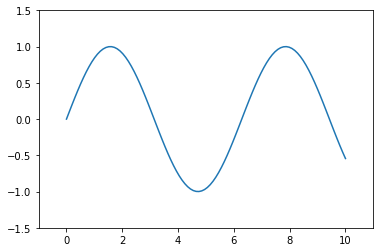

In [80]:
# x축, y축 범위 지정(xlim, ylim)
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

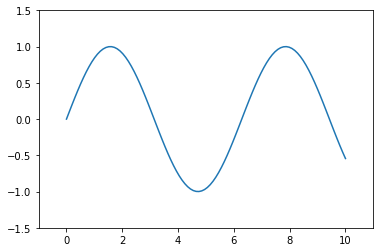

In [81]:
# x, y축 범위를 한꺼번에 정함 : axis
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]) # 연달아서 정함
plt.show()

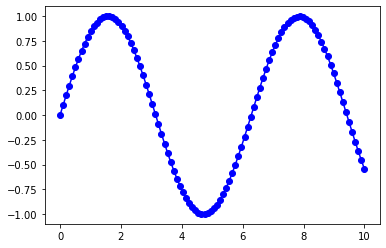

In [82]:
# 그래프 스타일 변경(찾아보기)
plt.plot(x, np.sin(x), 'b-o') # 파란색 동그라미로 변경
plt.show()

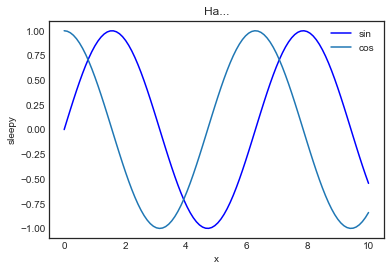

In [85]:
# style 지정해서 세련된 그림 그리기
plt.style.use('seaborn-white')
plt.plot(x, np.sin(x), 'b', label = 'sin')
plt.plot(x, np.cos(x), label = 'cos')

plt.legend(loc = 'upper right') # 범례의 위치를 오른쪽 위로 설정
plt.legend() # 범례 지정(라벨 지정)

plt.title('Ha...') # title

plt.xlabel('x')
plt.ylabel('sleepy') #라벨 지정
plt.show()

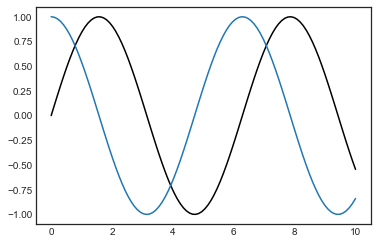

In [86]:
# axes를 이용하는 다른 방법! (객체화해서 쓰기)
ax = plt.axes()
ax.plot(x, np.sin(x), 'k-')
ax.plot(x, np.cos(x))
plt.show()

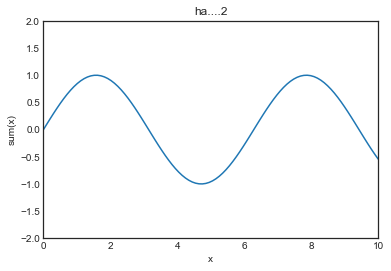

In [88]:
ax = plt.axes()
ax.plot(x, np.sin(x))

# set으로 x, y축 이름과 범위, 제목 한번에 지정!
ax.set(xlim = (0, 10), ylim=(-2, 2), xlabel='x', ylabel='sum(x)', title='ha....2')
plt.show()

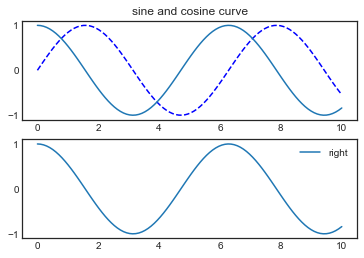

In [89]:
# 2개 이상의 그래프를 하나로 출력 : figure, subplot 이용!
x = np.linspace(0, 10, 100)

plt.figure() # 시작

# 첫번째 그래프
plt.subplot(2,1,1) # (행, 열, 몇번째 plot인지)
plt.plot(x,np.sin(x),'b--',label='sine')
plt.plot(x,np.cos(x),label='cosine')
plt.title('sine and cosine curve')

# 두번째 그래프
plt.subplot(2,1,2)
plt.plot(x,np.cos(x),label='right')
plt.legend(loc='best')

plt.show() 

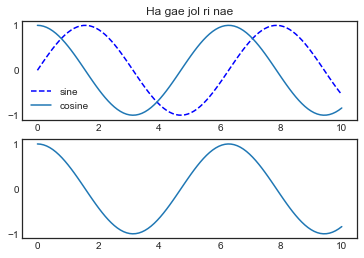

In [90]:
# 다른 방법! 
fig, ax = plt.subplots(2,1)

# 첫번째 그래프
ax[0].plot(x, np.sin(x), 'b--', label='sine')
ax[0].plot(x, np.cos(x), label='cosine')
ax[0].set_title('Ha gae jol ri nae')
ax[0].legend(loc='best')

# 두번째 그래프
ax[1].plot(x, np.cos(x))

plt.show()

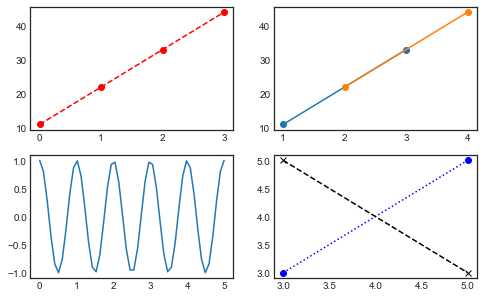

In [91]:
# 2*2 subplot
fig, ax = plt.subplots(2,2,figsize=(8,5))

ax[0][0].plot([11,22,33,44],'ro--')

ax[0][1].plot([[1,2],[3,4]],[[11,22],[33,44]],'o-')

ax[1][0].plot(np.linspace(0,5),np.cos(2*np.pi*np.linspace(0,5)))

ax[1][1].plot([3,5],[3,5],'bo:')
ax[1][1].plot([3,5],[5,3],'kx--')

plt.show()

### 2. seaborn

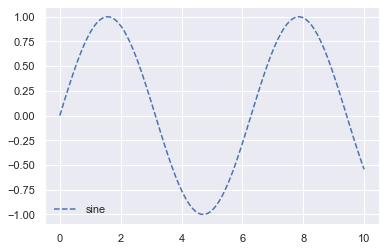

In [93]:
import seaborn as sns

sns.set()
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x),'b--',label='sine')
plt.legend(loc='best')
plt.show()

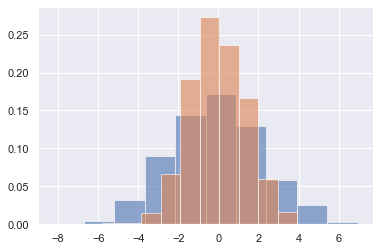

In [94]:
# 히스토그램
import pandas as pd
bn=np.random.multivariate_normal([0,0],[[5,1],[1,2]],size=1000)
bn=pd.DataFrame(bn,columns=['x','y'])

for i in 'xy':
    plt.hist(bn[i],density=True,alpha=0.6) 
    
# density=True는 y축 값을 백분율
# alpha는 그림의 투명도인데 1에 가까울수록 불투명(두 그림을 구별할 수 있도록)

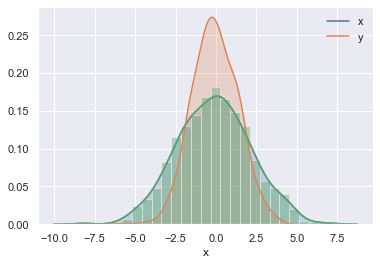

In [96]:
# 커널 밀도 함수
for i in 'xy':
    sns.kdeplot(bn[i], shade=True)
    
sns.distplot(bn['x']) # distplot : 막대그래프와 커널 density를 따로 그려줌

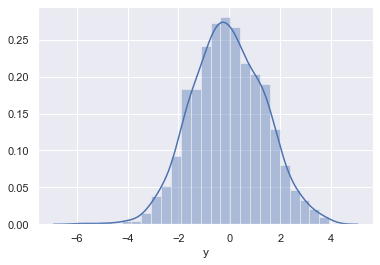

In [99]:
sns.distplot(bn['y'])

In [98]:
bn.head() # 2 dimension

,x,y
0,-1.516977,-2.192576
1,2.599563,-0.089555
2,0.091840,0.137130
3,-1.759471,-0.923335
4,4.677997,3.385394


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


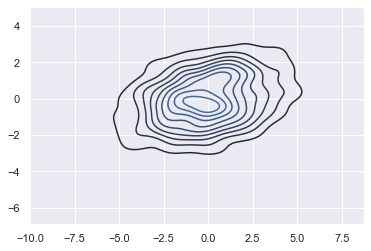

In [100]:
sns.kdeplot(bn) # 2 dimension 이므로, 추정치를 plot에 나타냄. 

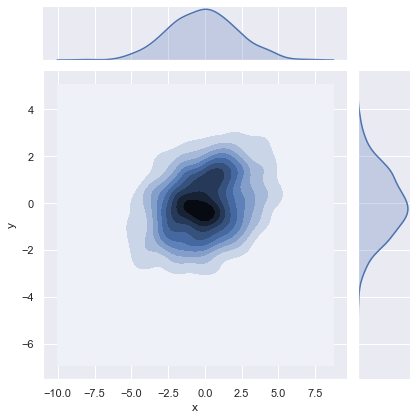

In [101]:
# kde와 주변분포 그리기(jointplot)
sns.jointplot(bn['x'], bn['y'], kind='kde')

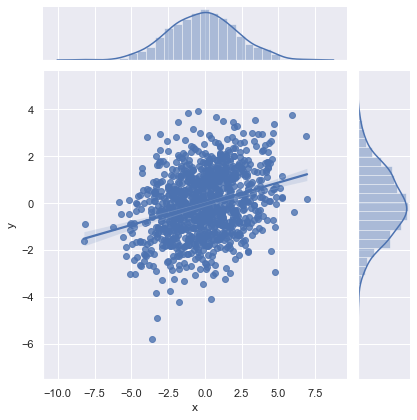

In [102]:
# 회귀선 그리기
sns.jointplot(bn['x'], bn['y'], kind='reg')

In [104]:
# iris data load
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


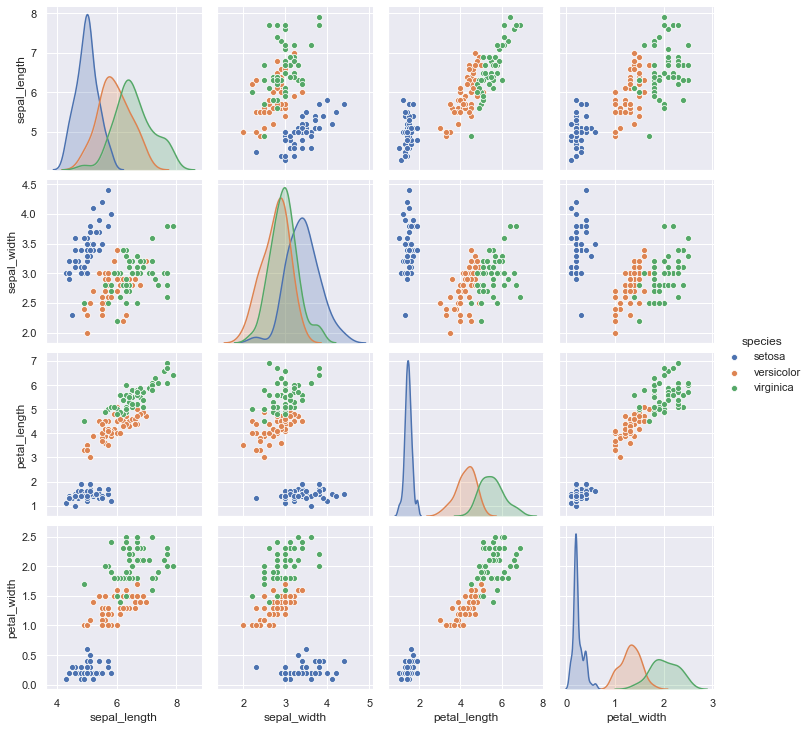

In [105]:
# pairplot
sns.pairplot(iris, hue='species')

In [106]:
# 또 다른 데이터 tip(범주형 factor별로 보고싶을때!)
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


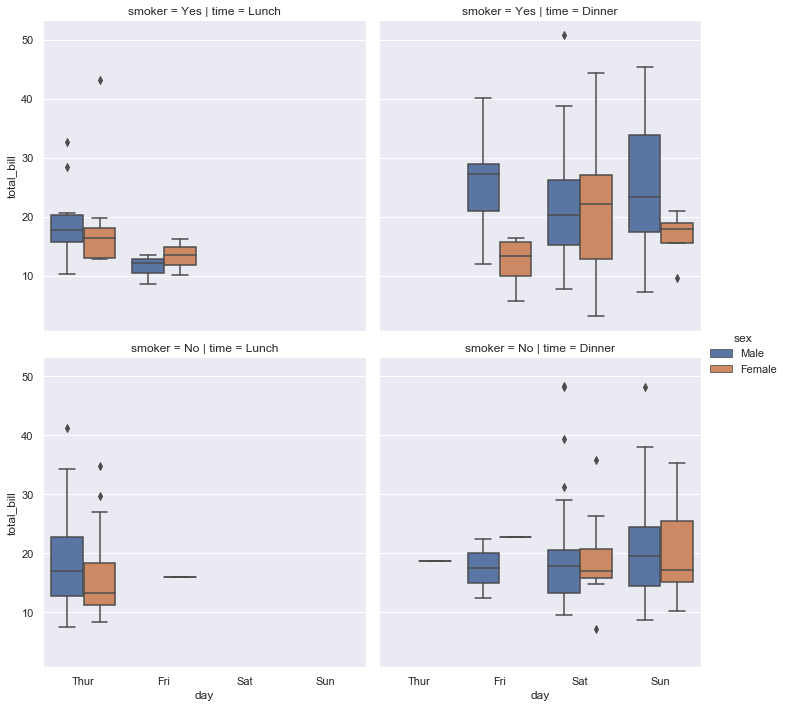

In [108]:
# factor plot(row/col 별로 day에 따른 total_bill)
sns.factorplot(x='day', y='total_bill', hue='sex', data=tips, 
              row='smoker', col='time', kind='box')

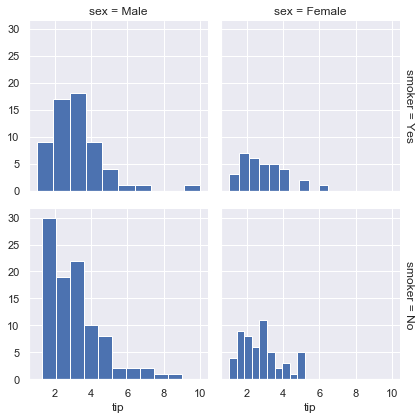

In [110]:
# facet grid
grid=sns.FacetGrid(data=tips,row='smoker',col='sex',margin_titles=True) # 열과 행에 그룹 정보 표시
grid.map(plt.hist,'tip')